In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

# Cleaning and Exploration (No class balancing was done)

In [3]:
raw_data.head(1)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.5,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
raw_data.shape

(20052, 680)

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


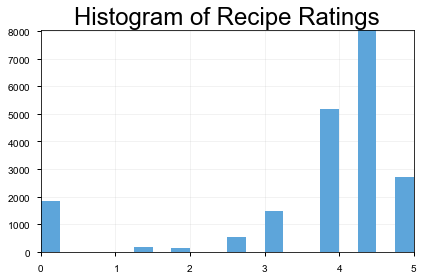

In [6]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [7]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
raw_data2 = raw_data.fillna(0)

In [9]:
raw_data2.isnull().sum().max()

0

# Rating Feature: 1 or 0

In [10]:

df = raw_data2
df1 = df.loc[((df["rating"] > -1)),]
df2 = df1.iloc[:,1:676]
df2['rating'] = df.apply(lambda x:  1 if x['rating'] >=  3.0 else 0, axis=1)
df2.head(5)

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks
0,0,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Extraction

In [11]:

df_trainX = df2.drop(['rating'], 1).sample(frac=0.3, replace=True, random_state=1)
df_trainY = df2.rating.sample(frac=0.3, replace=True, random_state=1)
X_train = df_trainX
Y_train = df_trainY.values.reshape(-1, 1)



In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, Y_train.ravel())
df_rfe = pd.DataFrame()
df_rfe["support"] = rfe.support_


In [13]:
df_rfe2 = df_rfe.T
df_rfe2.columns = df_trainX.columns
df_rfe2

,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,...,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks
support,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
d = 0

for cc in df_rfe2.columns:
    if df_rfe2[cc].values == False:
        df2 = df2.drop([cc],1)
print(d)


0


# Features

In [15]:
df2.columns

Index(['rating', '3-ingredient recipes', 'bon app��tit', 'braise',
       'breadcrumbs', 'campari', 'casserole/gratin', 'condiment',
       'créme de cacao', 'dip', 'drink', 'drinks', 'gin', 'harpercollins',
       'high fiber', 'meat', 'pickles', 'rosemary', 'stir-fry', 'tree nut',
       'weelicious'],
      dtype='object')

# SVC

In [16]:
df_trainX = df2.drop(['rating'], 1).sample(frac=0.5, replace=True, random_state=1)
df_trainY = df2.rating.sample(frac=0.5, replace=True, random_state=1)
X_train = df_trainX
Y_train = df_trainY.values.reshape(-1, 1)

In [17]:
from sklearn.svm import SVC
svc = SVC(C=10000,kernel='linear')
svc.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
svc.score(X_train, Y_train)

0.8781168960702175

In [19]:
df_testX = df2.drop(['rating'], 1).sample(frac=0.5, replace=True, random_state=1)
df_testY = df2.rating.sample(frac=0.5, replace=True, random_state=1)
X_test = df_testX
Y_test = df_testY.values.reshape(-1, 1)

In [20]:
from sklearn.metrics import accuracy_score
y_pred = svc.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.8781168960702175


In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X_train, Y_train, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([0.88085743, 0.87630923, 0.87880299, 0.87680798, 0.87630923])

# END